In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
master = pd.read_csv('data/master.csv')
NUM_CLUSTERS = 5

In [ ]:
# X = master[["AVG_DIST_DEF_OFF_RATIO","AVG_DIST_MILES_DEF_MIN","ContestedDREB%","DREBChances","AVGDREBDistance","DFGA"]]
X = master[["AVG_DIST_MILES_DEF_MIN","ContestedDREB%","DREBChances","AVGDREBDistance","DFGA"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=0).fit(X_scaled)
master['cluster'] = kmeans.labels_

/Users/kevinliu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


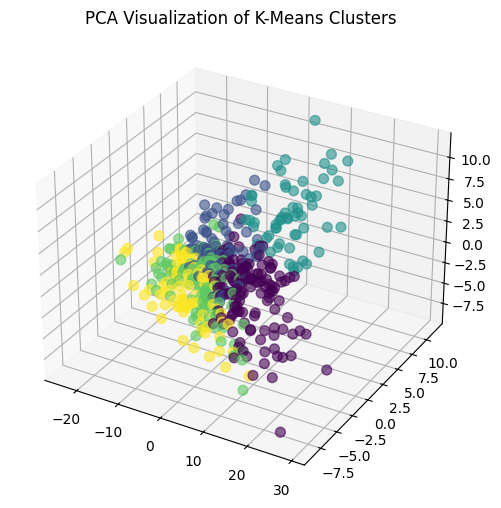

In [15]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 1], c=kmeans.labels_, s=50, cmap='viridis', alpha=0.6)
plt.title("PCA Visualization of K-Means Clusters")
# plt.xlabel("Component 1")
# plt.ylabel("Component 2")

# plt.colorbar()
plt.show()

In [10]:
for i in range(0, NUM_CLUSTERS):
    master[master['cluster'] == i].to_csv(f'data/clusters/clustered_{i}.csv', index=False)

In [11]:
master.to_csv('data/clustered.csv', index=False)